# Prep

https://mapapps.bgs.ac.uk/geologyofbritain/home.html

In [1]:
import pooch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import verde as vd
import harmonica as hm
import boule as bl

In [2]:
unzipped_files = pooch.retrieve(
    url="https://www.bgs.ac.uk/?wpdmdl=11840", 
    known_hash="37f0469f095bc2aa9b2cd5999eb18b2494f7a1a6b3e5f10df90aab40accee18b", 
    fname="britain-gravity.zip",
    processor=pooch.Unzip(),
)

/home/leo/miniconda3/envs/gravity/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
data = pd.read_csv(unzipped_files[0])
data

/home/leo/miniconda3/envs/gravity/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (8,19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SURVEY_AREA,STATION_ID,STATION_CODE,LATITUDE,LONGITUDE,GRID_EAST,GRID_NORTH,STATION_ELEV,ELEVATION_UNIT,BOUGUER_DENS,...,ITOT_TC,ITOT_TCZ,TOT_TC,TOT_TCZ,BOUGUER_AN,SOURCE_CODE,READING_DATE,GRS,NTC,label
0,UK NATIONAL GRID SER,NG_08C01,NaN,57.747669,-7.04250,100040,884250,3.0,NaN,2.7,...,0.0,Q,0.07,X,47.34,+82,NaN,NaN,0.0,100040_884250
1,UK NATIONAL GRID SER,NB_00A04,NaN,57.975670,-7.07383,100080,909730,99.0,NaN,2.7,...,0.0,Q,1.60,X,31.92,-82,NaN,NaN,0.0,100080_909730
2,UK COUNTY SERIES,TIREE_24,NaN,56.490170,-6.87317,100100,743750,1.8,NaN,2.7,...,0.0,Q,0.00,Z,46.31,-67H,NaN,NaN,0.0,100100_743750
3,UK NATIONAL GRID SER,NB_02C01,NaN,58.110001,-7.09200,100140,924730,186.0,NaN,2.7,...,0.0,Q,2.73,X,26.50,-82,NaN,NaN,0.0,100140_924730
4,UK NATIONAL GRID SER,NB_01C03,NaN,58.001671,-7.07550,100200,912620,306.0,NaN,2.7,...,0.0,Q,6.48,X,31.42,-82,NaN,NaN,0.0,100200_912620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152112,UK COUNTY SERIES,19_22_20,NaN,57.760830,-7.04650,99910,885730,2.1,NaN,2.7,...,0.0,Q,0.10,Q,49.49,-67H,NaN,NaN,0.0,99910_885730
152113,UK NATIONAL GRID SER,NA_92D08,NaN,58.094002,-7.09367,99910,922970,110.0,NaN,2.7,...,0.0,Q,1.59,X,27.61,-82,NaN,NaN,0.0,99910_922970
152114,UK NATIONAL GRID SER,NA_92B01,NaN,58.126339,-7.09833,99910,926580,70.0,NaN,2.7,...,0.0,Q,0.81,X,24.79,+82,NaN,NaN,0.0,99910_926580
152115,UK NATIONAL GRID SER,NF_98B09,NaN,57.761829,-7.04633,99930,885850,2.5,NaN,2.7,...,0.0,Q,0.10,X,49.62,+82,NaN,NaN,0.0,99930_885850


In [4]:
data.columns

/home/leo/miniconda3/envs/gravity/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['SURVEY_AREA', 'STATION_ID', 'STATION_CODE', 'LATITUDE', 'LONGITUDE',
       'GRID_EAST', 'GRID_NORTH', 'STATION_ELEV', 'ELEVATION_UNIT',
       'BOUGUER_DENS', 'BASE_CODE', 'OBSERVED_GRAV', 'FREE_AIR_AN', 'ITOT_TC',
       'ITOT_TCZ', 'TOT_TC', 'TOT_TCZ', 'BOUGUER_AN', 'SOURCE_CODE',
       'READING_DATE', 'GRS', 'NTC', 'label'],
      dtype='object')

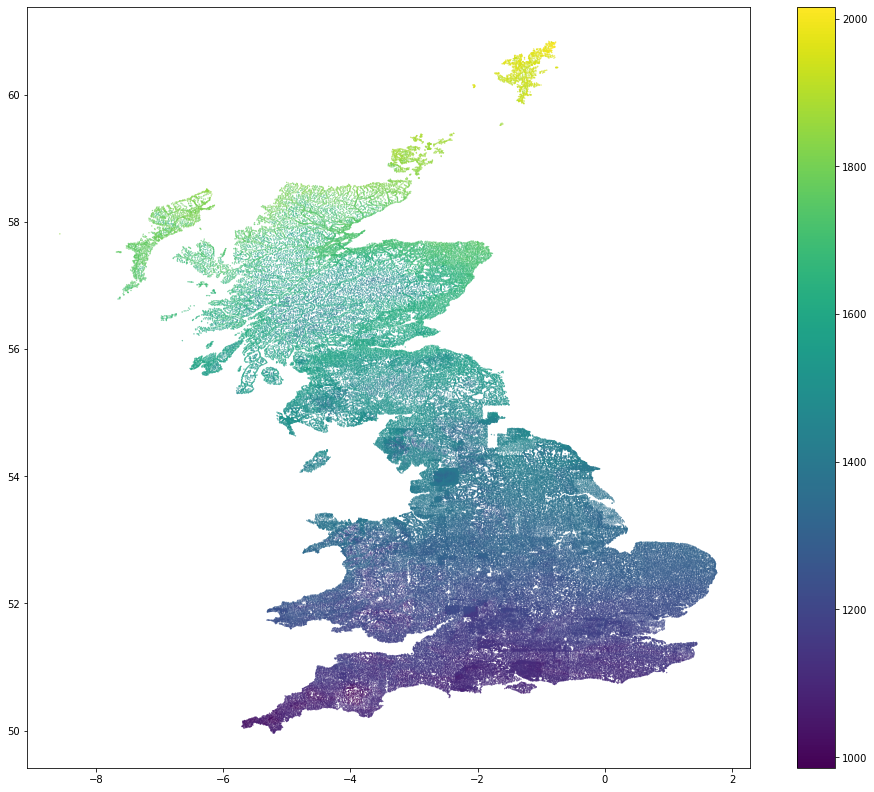

In [19]:
plt.figure(figsize=(17, 14))
plt.scatter(data.LONGITUDE, data.LATITUDE, c=data.OBSERVED_GRAV, s=0.1)
plt.axis("scaled")
plt.colorbar()

In [49]:
region = [-4.6, -3.9, 54.5, 55.3]
survey = data[np.logical_and(vd.inside((data.LONGITUDE, data.LATITUDE), region), data.STATION_ELEV > 0)][::3]
survey.shape

/home/leo/miniconda3/envs/gravity/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(485, 23)

/home/leo/miniconda3/envs/gravity/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


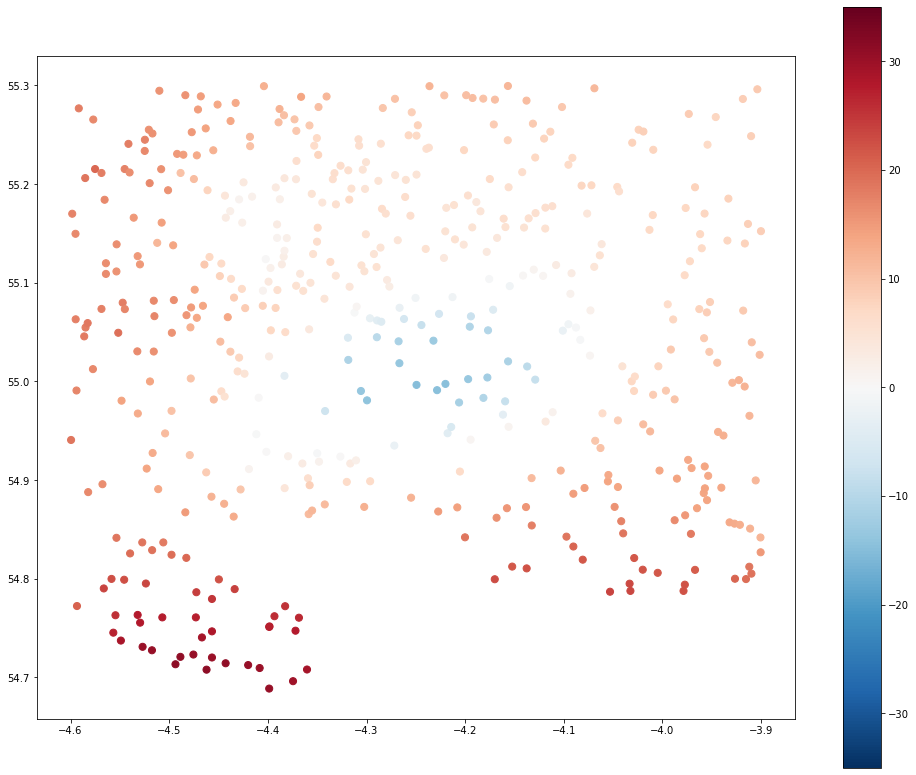

In [50]:
plt.figure(figsize=(17, 14))
plt.scatter(survey.LONGITUDE, survey.LATITUDE, c=survey.BOUGUER_AN, s=50, vmin=-35, vmax=35, cmap="RdBu_r")
plt.axis("scaled")
plt.colorbar()

In [51]:
survey["disturbance"] = survey.OBSERVED_GRAV

/home/leo/miniconda3/envs/gravity/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


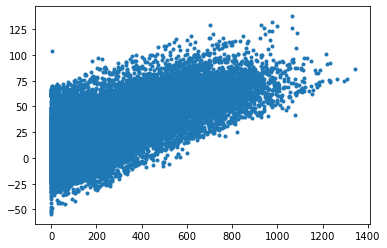

In [60]:
plt.plot(data.STATION_ELEV, data.FREE_AIR_AN, ".")

In [56]:
root = hm.isostasy_airy(survey.STATION_ELEV, reference_depth=0)

/home/leo/miniconda3/envs/gravity/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


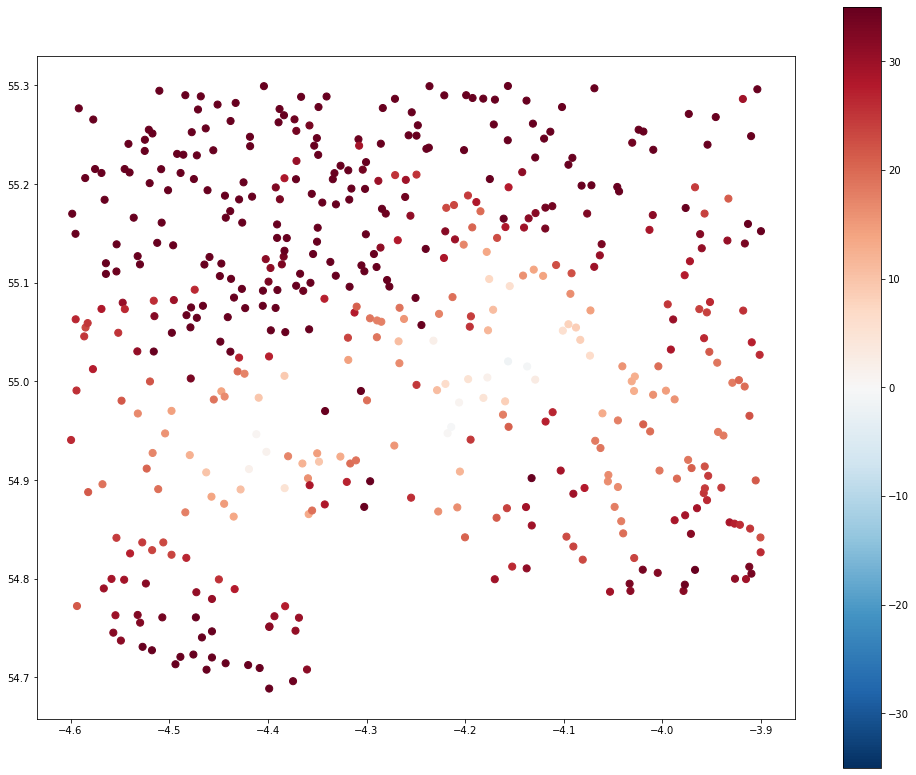

In [58]:
plt.figure(figsize=(17, 14))
plt.scatter(
    survey.LONGITUDE, survey.LATITUDE, 
    c=survey.BOUGUER_AN - 1e5*2*np.pi*hm.constants.GRAVITATIONAL_CONST*(2800 - 3300)*root, 
    s=50, vmin=-35, vmax=35, cmap="RdBu_r",
)
plt.axis("scaled")
plt.colorbar()